In [1]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [2]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [3]:
a.add(112003)
a.add(111407)
a.repeat('1,2', 2)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   2 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   2 |     111407 | 100              | passive   |
|   3 |     112003 | 100              | passive   |
|   4 |     111407 | 100              | passive   |
|   5 |     112003 | 100              | passive   |
|   6 |     111407 | 100              | passive   |


In [57]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    #min = 1-stack.average(TR, c, delta)
    min = stack.average(TR, c, delta)
    #print min

    return min**10

In [5]:
def test(stack, film_range):
    for i in range(film_range[0],film_range[1]):
        print stack.config[i], film_range

In [101]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((1,20))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [7]:
minTR(a,[1,len(a.config)-1],0.6,0.001)

[1, 6]
[1, 2, 3, 4, 5, 6]


  status: 9
 success: False
    njev: 101
    nfev: 839
     fun: 0.001484104425090017
       x: array([  81.67756621,  101.5530167 ,   81.83881971,  101.40684855,
         81.92749229,  101.35446587])
 message: 'Iteration limit exceeded'
     jac: array([  2.14204192e-08,  -4.22151061e-08,   1.68802217e-09,
         3.96539690e-08,  -2.52475729e-08,  -9.76433512e-09,
         0.00000000e+00])
     nit: 101

In [8]:
a.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 81.6775662124    | passive   |
|   2 |     111407 | 101.5530167      | passive   |
|   3 |     112003 | 81.8388197115    | passive   |
|   4 |     111407 | 101.406848554    | passive   |
|   5 |     112003 | 81.9274922917    | passive   |
|   6 |     111407 | 101.354465886    | passive   |


In [9]:
a.library.search('CdTe')

|     ID | SHELF   | BOOK   | PAGE        | DESCRIPTION                    |
|--------+---------+--------+-------------+--------------------------------|
| 116601 | main    | CdTe   | DeBell-300K | DeBell et al. 1979: n 6-22 µm; |
| 116602 | main    | CdTe   | DeBell-80K  | DeBell et al. 1979: n 6-22 µm; |
| 116603 | main    | CdTe   | DeBell-20K  | DeBell et al. 1979: n 6-22 µm; |
| 116604 | main    | CdTe   | Marple      | Marple 1964: n 0.86-2.5 µm     |
| 116605 | main    | CdTe   | Treharne    | Treharne et al. 2011: n,k 0.3- |


In [10]:
#start a new stack


b = traml.Stack()
b.add(111407)
b.add(112003)

b.repeat('1,2',1)




#add layers


|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   2 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   2 |     112003 | 100              | passive   |
|   3 |     111407 | 100              | passive   |
|   4 |     112003 | 100              | passive   |


In [11]:
b.remove()

In [12]:

minTR(b, [1,len(b.config)-1], 0.5, 0.02, TR='R')
    


[1, 3]
[1, 2, 3]


  status: 0
 success: True
    njev: 44
    nfev: 234
     fun: 0.091955583360662896
       x: array([ 167.86404626,   65.41876235,   84.11724129])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.,  0.,  0.,  0.])
     nit: 44

In [13]:
b.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 167.864046257    | passive   |
|   2 |     112003 | 65.4187623515    | passive   |
|   3 |     111407 | 84.1172413018    | passive   |


|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 750              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 750              | passive   |
|   2 |     114203 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 750              | passive   |
|   2 |     114203 | 100              | passive   |
|   3 |     116605 | 2000             | absorber  |
18.9823375056 (ma/cm^2)
even 0
|   # |   Material | Thickness (n

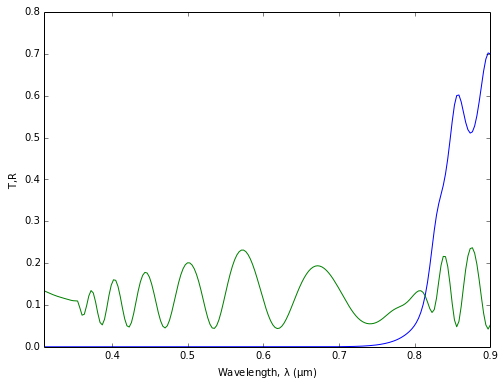

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000149    | passive   |
|   3 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000149    | passive   |
|   3 |     112003 | 100              | passive   |
|   4 |     112003 | 750              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000149    | passive   |
|   3 |     112003 | 100              | passive   |
|   4 |     

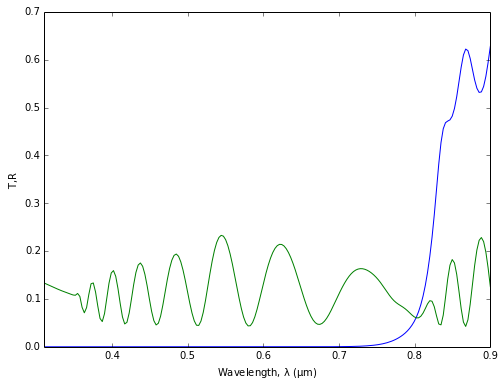

even 2
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100              | passive   |
|   5 |     112003 | 750              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2

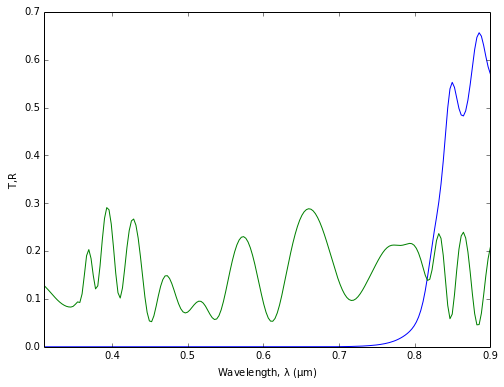

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100              | passive   |
|   6 |     112003 | 750              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     

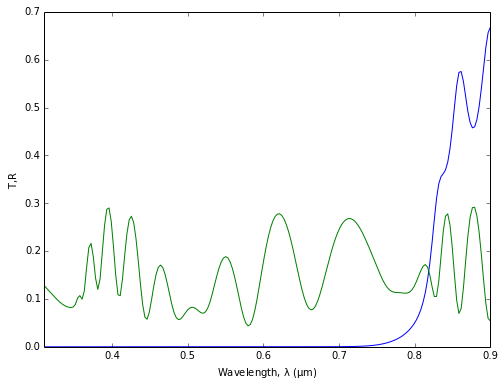

even 4
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100.000000015    | passive   |
|   6 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100.000000015    | passive   |
|   6 |     111407 | 100              | passive   |
|   7 |     112003 | 750              | passive   |
|   #

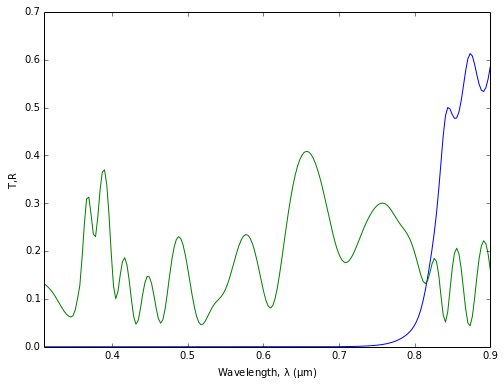

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100.000000015    | passive   |
|   6 |     111407 | 100.000000015    | passive   |
|   7 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 20.0             | passive   |
|   2 |     111407 | 20.0000000138    | passive   |
|   3 |     112003 | 94.3507670748    | passive   |
|   4 |     111407 | 100.000000015    | passive   |
|   5 |     112003 | 100.000000015    | passive   |
|   6 |     111407 | 100.000000015    | passive   |
|   7 |     

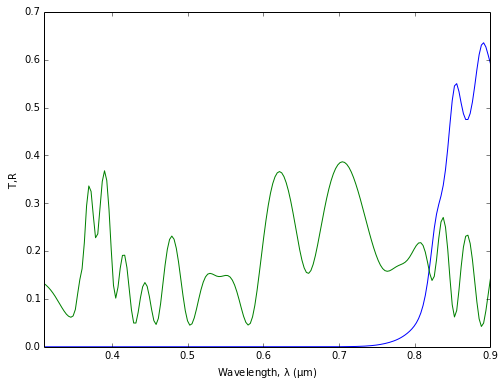

In [102]:
c = traml.Stack()

peak = 0.65
delta = 0.2
mat1 = 111407
mat2 = 112003

c.add(mat2, 750)
c.add(114203, 100) #CdS
c.add(116605, 2000, film_type='absorber') #CdTe

R = [c.average(R,peak,delta)]
n = [0]
it = [6]
jsc = [c.jsc()]

c.remove()
c.remove()

for i in range(0, 6):
    if i % 2 == 0:
        print 'even', i
        c.add(mat1)
    else:
        c.add(mat2)
        
    c.add(mat2, 750)    
    c.add(114203, 100)
    c.add(116605, 2000, film_type='absorber')
    
    result = minTR(c, [1,len(c.config)-4], peak, delta, TR='R')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    jsc.append(c.jsc())
    c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    
    c.plot()
    c.remove()
    c.remove()
    c.remove()
   
    print '============================================================================================'

In [26]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 168.667897624    | passive   |
|   2 |     112003 | 65.7966675638    | passive   |
|   3 |     111407 | 84.6789792553    | passive   |
|   4 |     112003 | 64.6155822881    | passive   |
|   5 |     111407 | 83.9803625308    | passive   |
|   6 |     112003 | 64.9243663459    | passive   |
|   7 |     111407 | 85.8476579897    | passive   |
|   8 |     112003 | 66.9277545434    | passive   |
|   9 |     111407 | 79.6004166558    | passive   |
|  10 |     112003 | 67.4824069839    | passive   |


In [21]:
import matplotlib.pyplot as plt

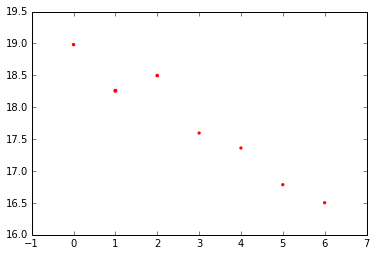

In [103]:
plt.scatter(n, jsc, s=it, color='red')

In [78]:
min(R)

0.052239363891684078

In [79]:
d = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [81]:
d.add(mat1, 0)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 0                | passive   |


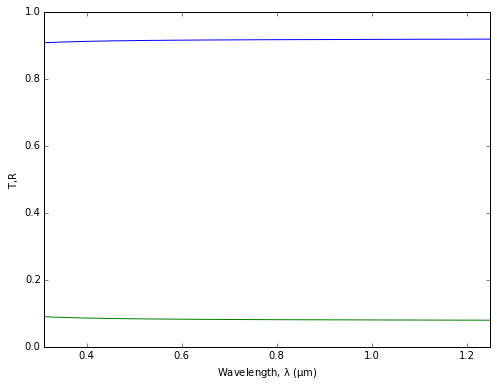

In [82]:
d.plot()

In [84]:
print d.average('R',0.5, 0.02)

0.0836734724591
